# State Space equation 


In [5]:
#import library
import numpy as np
import matplotlib.pyplot as plt
#State Space Matrix 
A = np.array([[0, 1, 0],          
              [99.67, 0, 7.78],
              [0, 0, -82.64]])
B = np.array([[0],
              [-74.701],
              [792.56]])
C = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
D = np.array([[0], [0],[0]])

In [6]:
# PID controller parameters
kp_pos = 1.6
ki_pos = 0.08
kd_pos = 0.0

In [7]:
# Simulation parameters
dt = 0.001  # time step
t_sim = np.arange(0,100, dt)  # time vector

# Initial conditions
x0 = np.array([0, 0, 0])  # initial state of 
u = np.zeros_like(t_sim)  # input signal (initially zero)

setpoint_pos = np.array([90, 0, 0]) #set degree positive that degree measure from vertical  

# PID controller variables
prev_error_pos = setpoint_pos[0] - x0[0] 
integral_pos = 0.0 #integral term

x0_history = []  # Store x0 values for plotting
error_pos_history = [] #Store Error
u_pos_history = [] 
m = -1 #parameter to Switch direction
round = 0 
# Simulation loop
for i in range(len(t_sim)):
    x0_history.append(x0.copy())  # Store the current state for plotting
    error_pos_history.append(prev_error_pos) # Store Error
    error_pos = setpoint_pos[0] - x0[0] #calculate error pos
    
    #Store integral term
    integral_pos += error_pos * dt
    #Calculate pid 
    u_pos = kp_pos * error_pos + ki_pos * integral_pos + kd_pos * (error_pos - prev_error_pos) / dt
    #set direction of motor
    u_pos = m*u_pos
    u_pos_history.append(u_pos) 
    #input to plant
    u[i] = u_pos 
    #limit Voltage input 
    if (u[i] > 24 ):
        u[i] = 24 
    elif (u[i] < -24 ):
        u[i] = -24 
    #break system at set point and clear integral term
    if (error_pos <= 0.5 and error_pos >= -0.5 and round == 0):
        x0[1] = 0
        x0[2] = 0
        integral_pos = 0
        round = 1
        print(i)
    #calculate next state
    x_dot = np.matmul(A, x0) + np.matmul(B, np.array([u[i]]))
    #Switch direction of cube 
    if(x_dot[2] >0 and setpoint_pos[0] >= 0):
        x_dot[1] = x_dot[1]*-1
    if(x_dot[2] <0 and setpoint_pos[0] < 0):
        x_dot[1] = x_dot[1]*-1
    # Update state using Euler method
    x0 = x0 + x_dot * dt
    x0 = x0.flatten()  # Ensure x0 remains a 1D array
    # Update previous error
    prev_error_pos = error_pos

458


C:\Users\msi1\AppData\Local\Temp\ipykernel_27608\1213866928.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\msi1\AppData\Local\Temp\ipykernel_27608\1213866928.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


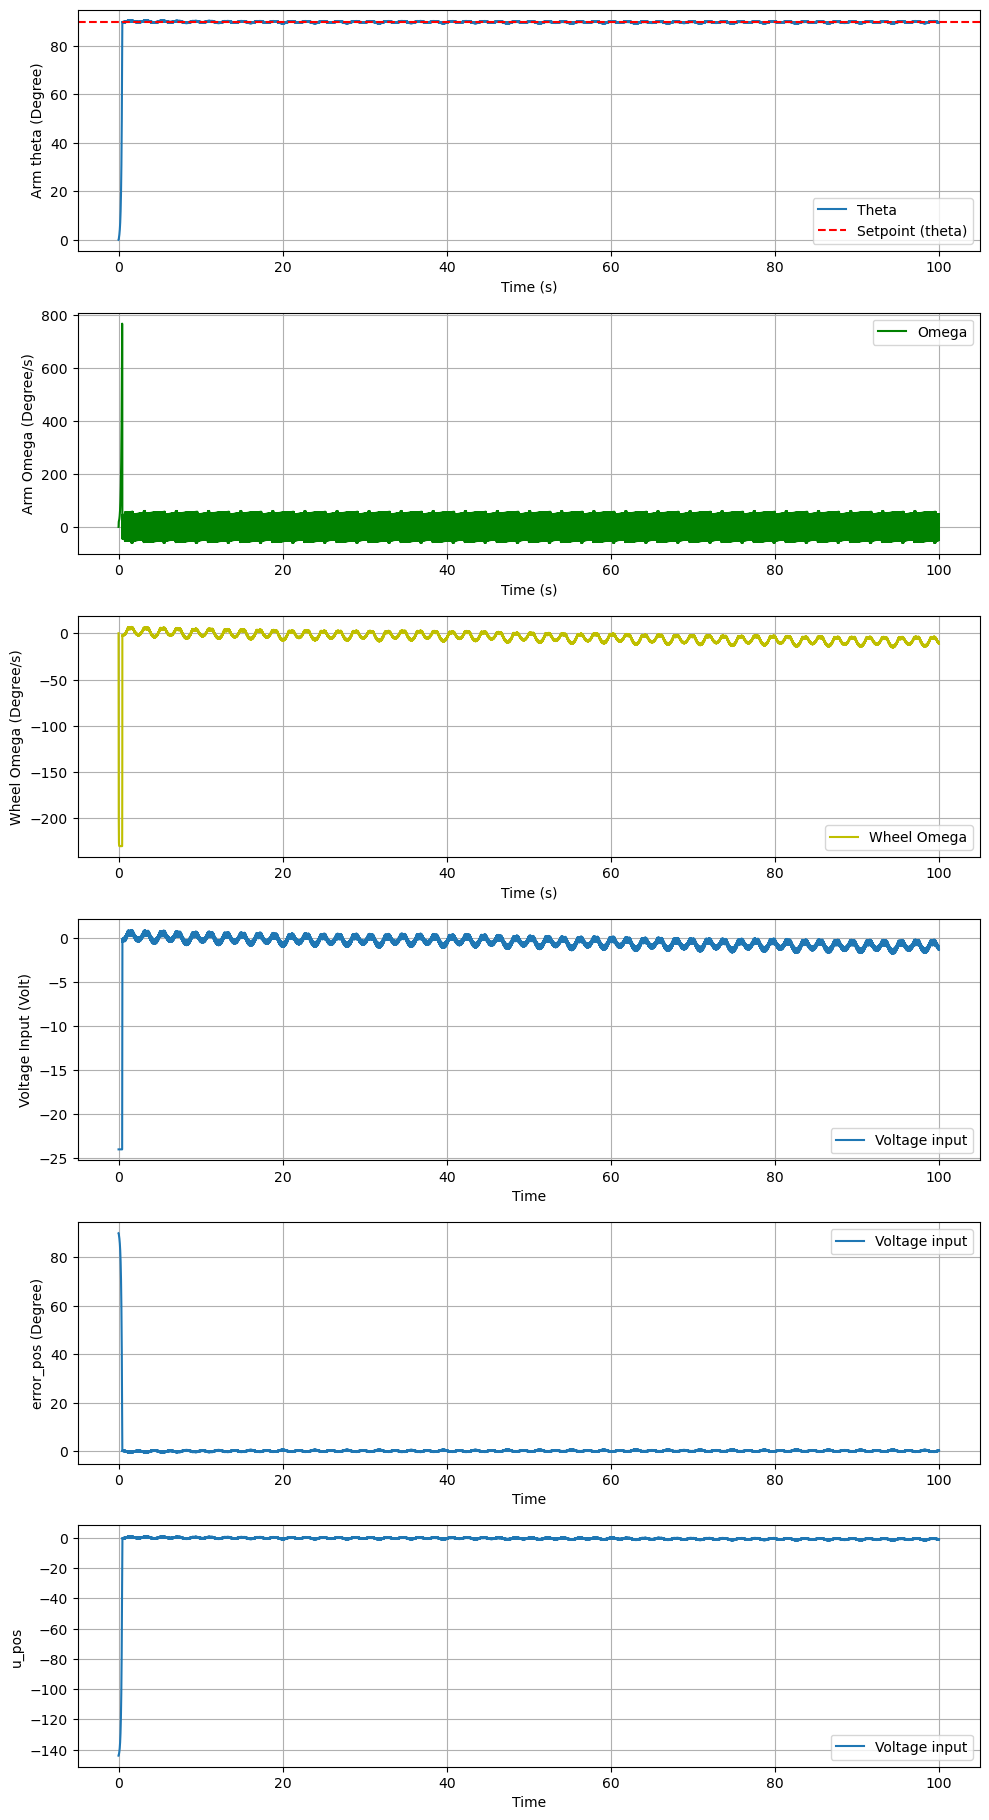

In [8]:
# Convert x0_history to a numpy array for easy indexing
x0_history = np.array(x0_history)
# Output calculation
y_history = [np.dot(C, x) + np.dot(D, u_i) for x, u_i in zip(x0_history, u)]
# Plot the results
plt.figure(figsize=(10, 30))
start = 0
plt.subplot(10, 1, 1)
plt.plot(t_sim[start:], x0_history[start:, 0], label='Theta')
plt.axhline(y=setpoint_pos[0], color='r',linestyle='--', label='Setpoint (theta)')
plt.xlabel('Time (s)')
plt.ylabel('Arm theta (Degree)')
plt.legend()
plt.grid(True)

plt.subplot(10, 1, 2)
plt.plot(t_sim[start:], x0_history[start:, 1], label='Omega', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Arm Omega (Degree/s)')
plt.legend()
plt.grid(True)

plt.subplot(10, 1, 3)
plt.plot(t_sim[start:], x0_history[start:, 2], label='Wheel Omega', color='y')
plt.xlabel('Time (s)')
plt.ylabel('Wheel Omega (Degree/s)')
plt.legend()
plt.grid(True)

plt.subplot(10, 1, 4)
plt.plot(t_sim, u, label='Voltage input')
plt.xlabel('Time')
plt.ylabel('Voltage Input (Volt)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(10, 1, 5)
plt.plot(t_sim, error_pos_history, label='Voltage input')
plt.xlabel('Time')
plt.ylabel('error_pos (Degree)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(10, 1, 6)
plt.plot(t_sim, u_pos_history, label='Voltage input')
plt.xlabel('Time')
plt.ylabel('u_pos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()